# Extract data from DrugCentral

Purpose of this notebook is to extract and format drug data for subsequent model annotation.

Currently uses the 2021 TSV file download.

### Citations
Avram S, Wilson TB, Curpan R, Halip L, Borota A, Bora A, Bologa CG, Holmes J, Knockel J, Yang JJ, Oprea TI. DrugCentral 2023 extends human clinical data and integrates veterinary drugs. Nucleic Acids Res. 2023 Jan 6;51(D1):D1276-D1287. doi: 10.1093/nar/gkac1085. PMID: 36484092; PMCID: PMC9825566.

## Setup
### Import packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from rbc_gem_utils import (ANNOTATION_PATH, DATABASE_PATH, GEM_NAME,
                           INTERIM_PATH, ROOT_PATH, build_string,
                           compare_tables, explode_column, get_annotation_df,
                           read_rbc_model, visualize_comparison)
from rbc_gem_utils.database import DRUGCENTRAL_DB_TAG, DRUGCENTRAL_PATH

## Load RBC-GEM model

In [2]:
model = read_rbc_model(filetype="xml")
model

Set parameter Username
Academic license - for non-commercial use only - expires 2025-11-21


Name,RBC_GEM
Memory address,1472d8610
Number of metabolites,2157
Number of reactions,3275
Number of genes,820
Number of groups,78
Objective expression,1.0*NaKt - 1.0*NaKt_reverse_db47e
Compartments,"cytosol, extracellular space"


In [3]:
annotation_type = "genes"
annotation_cols = ["uniprot", "drugbank", "drugcentral", "hgnc.symbol"]
mapping_key = "uniprot"

df_model_mappings = (
    get_annotation_df(model.genes, annotation_cols)
    .rename({"id": annotation_type}, axis=1)
    .dropna(subset=[mapping_key])
)
for col in df_model_mappings.columns:
    df_model_mappings = explode_column(df_model_mappings, name=col, sep=";")
df_model_mappings = df_model_mappings.sort_values(annotation_type)

print(df_model_mappings.nunique(dropna=True))
df_model_mappings = df_model_mappings.reset_index(drop=True)

df_model_mappings

genes           820
uniprot         820
drugbank       2440
drugcentral     687
hgnc.symbol     821
dtype: int64


,genes,uniprot,drugbank,drugcentral,hgnc.symbol
0,A4GALT,Q9NPC4,<NA>,<NA>,A4GALT
1,AARS1,P49588,DB00160,<NA>,AARS1
2,AASDHPPT,Q9NRN7,<NA>,<NA>,AASDHPPT
3,ABCA1,O95477,DB11635,2269,ABCA1
4,ABCA1,O95477,DB01599,2269,ABCA1
...,...,...,...,...,...
107506,YES1,P07947,DB01254,4178,YES1
107507,ZDHHC2,Q9UIJ5,<NA>,<NA>,ZDHHC2
107508,ZDHHC20,Q5W0Z9,<NA>,<NA>,ZDHHC20
107509,ZDHHC3,Q9NYG2,<NA>,<NA>,ZDHHC3


## Set notebook options

In [4]:
database_dirpath = ROOT_PATH / DATABASE_PATH / DRUGCENTRAL_PATH
annotation_dirpath = ROOT_PATH / ANNOTATION_PATH
# Compare to/Overwrite previous files
compare_figsize = (5, 5)
compare = True
display_nunique = True
overwrite = True
db_tag = DRUGCENTRAL_DB_TAG
df_model_mappings.loc[:, [annotation_type, mapping_key]].drop_duplicates()

,genes,uniprot
0,A4GALT,Q9NPC4
1,AARS1,P49588
2,AASDHPPT,Q9NRN7
3,ABCA1,O95477
9,ABCA7,Q8IZY2
...,...,...
107477,YES1,P07947
107507,ZDHHC2,Q9UIJ5
107508,ZDHHC20,Q5W0Z9
107509,ZDHHC3,Q9NYG2


## Parse DrugCentral information into DataFrame

In [5]:
df_drugcentral = pd.read_csv(
    database_dirpath / "drug.target.interaction.tsv",
    sep="\t",
    dtype=str,
)
# Filter out non-human entries
df_drugcentral = df_drugcentral[
    df_drugcentral["ORGANISM"].str.find("Homo sapiens") != -1
]
df_drugcentral

,DRUG_NAME,STRUCT_ID,TARGET_NAME,TARGET_CLASS,ACCESSION,GENE,SWISSPROT,ACT_VALUE,ACT_UNIT,ACT_TYPE,ACT_COMMENT,ACT_SOURCE,RELATION,MOA,MOA_SOURCE,ACT_SOURCE_URL,MOA_SOURCE_URL,ACTION_TYPE,TDL,ORGANISM
0,levobupivacaine,4,Potassium voltage-gated channel subfamily H me...,Ion channel,Q12809,KCNH2,KCNH2_HUMAN,4.89,NaN,IC50,Inhibition of wild-type human ERG channel expr...,CHEMBL,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
1,levobupivacaine,4,Sodium channel protein type 1 subunit alpha,Ion channel,P35498,SCN1A,SCN1A_HUMAN,5.79,NaN,IC50,NaN,WOMBAT-PK,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
2,levobupivacaine,4,Sodium channel protein type 4 subunit alpha,Ion channel,P35499,SCN4A,SCN4A_HUMAN,NaN,NaN,NaN,NaN,WOMBAT-PK,NaN,1,CHEMBL,NaN,https://www.ebi.ac.uk/chembl/compound/inspect/...,BLOCKER,Tclin,Homo sapiens
3,levobupivacaine,4,Prostaglandin E2 receptor EP1 subtype,GPCR,P34995,PTGER1,PE2R1_HUMAN,NaN,NaN,NaN,NaN,WOMBAT-PK,NaN,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
4,levobupivacaine,4,Cytochrome P450 2D6,Enzyme,P10635,CYP2D6,CP2D6_HUMAN,6.707,NaN,IC50,"DRUGMATRIX: CYP450, 2D6 enzyme inhibition (sub...",DRUG MATRIX,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19370,infigratinib,5459,Fibroblast growth factor receptor 1,Kinase,P11362,FGFR1,FGFR1_HUMAN,8.99,NaN,NaN,Mechanism of Action,DRUG LABEL,=,1,DRUG LABEL,https://www.accessdata.fda.gov/drugsatfda_docs...,https://www.accessdata.fda.gov/drugsatfda_docs...,INHIBITOR,Tclin,Homo sapiens
19371,samidorphan,5460,Mu-type opioid receptor,GPCR,P35372,OPRM1,OPRM_HUMAN,10.28,NaN,Ki,Possible target for the mechanism of action of...,DRUG LABEL,=,NaN,NaN,https://www.accessdata.fda.gov/drugsatfda_docs...,NaN,ANTAGONIST,Tclin,Homo sapiens
19372,samidorphan,5460,Kappa-type opioid receptor,GPCR,P41145,OPRK1,OPRK_HUMAN,9.64,NaN,Ki,NaN,DRUG LABEL,=,NaN,NaN,https://www.accessdata.fda.gov/drugsatfda_docs...,NaN,PARTIAL AGONIST,Tclin,Homo sapiens
19373,samidorphan,5460,Delta-type opioid receptor,GPCR,P41143,OPRD1,OPRD_HUMAN,8.59,NaN,Ki,NaN,DRUG LABEL,=,NaN,NaN,https://www.accessdata.fda.gov/drugsatfda_docs...,NaN,PARTIAL AGONIST,Tclin,Homo sapiens


In [6]:
rename_mapping = {col: col.lower() for col in df_drugcentral.columns}
rename_mapping.update(
    {
        "ACCESSION": "uniprot",
        "GENE": "hgnc.symbol",
        "STRUCT_ID": "drugcentral",
        "drug_name": "name",
    }
)
df_model_drugcentral = pd.merge(
    df_model_mappings.loc[:, [annotation_type, mapping_key]],
    df_drugcentral.rename(rename_mapping, axis=1),
    left_on=mapping_key,
    right_on=mapping_key,
    how="left",
)

df_model_drugcentral = df_model_drugcentral[df_model_drugcentral["drugcentral"].notna()]
# df_model_drugcentral = df_model_drugcentral.groupby(annotation_type, as_index=False).agg(lambda x:  build_string(list(x.dropna().unique())))
df_model_drugcentral = df_model_drugcentral.loc[
    :,
    [
        "genes",
        "uniprot",
        "hgnc.symbol",
        "drugcentral",
        "drug_name",
        "target_class",
        "action_type",
    ],
]
df_model_drugcentral = df_model_drugcentral.drop_duplicates().reset_index(drop=True)

if display_nunique:
    for col in df_model_drugcentral.columns:
        df = explode_column(df_model_drugcentral, name=col, sep=";")
        df = df[col].drop_duplicates()
        print(f"{df.name}: {df.nunique()}")

df_model_drugcentral = df_model_drugcentral.reset_index(drop=True)


if overwrite:
    df_model_drugcentral.to_csv(
        database_dirpath / f"{db_tag}_{GEM_NAME}.tsv", sep="\t", index=False
    )
else:
    df_model_drugcentral.to_csv(
        ROOT_PATH / INTERIM_PATH / f"{db_tag}_{GEM_NAME}.tsv", sep="\t", index=False
    )
df_model_drugcentral

genes: 221
uniprot: 221
hgnc.symbol: 221
drugcentral: 687
drug_name: 687
target_class: 9
action_type: 13


,genes,uniprot,hgnc.symbol,drugcentral,drug_name,target_class,action_type
0,ABCA1,O95477,ABCA1,2269,probucol,Transporter,INHIBITOR
1,ABCB1,P08183,ABCB1,82,acrivastine,Transporter,NaN
2,ABCB1,P08183,ABCB1,114,alfentanil,Transporter,NaN
3,ABCB1,P08183,ABCB1,119,aliskiren,Transporter,NaN
4,ABCB1,P08183,ABCB1,176,amiodarone,Transporter,NaN
...,...,...,...,...,...,...,...
1522,YES1,P07947,YES1,4903,nintedanib,Kinase,NaN
1523,YES1,P07947,YES1,5231,midostaurin,Kinase,NaN
1524,YES1,P07947,YES1,5252,neratinib,Kinase,NaN
1525,YES1,P07947,YES1,5347,fedratinib,Kinase,NaN


genes: 221
uniprot: 221
hgnc.symbol: 221
drugcentral: 687


,genes,uniprot,hgnc.symbol,drugcentral
0,ABCA1,O95477,ABCA1,2269
1,ABCB1,P08183,ABCB1,82;114;119;176;191;219;242;249;254;271;276;419...
2,ABCC1,P33527,ABCC1,219;318;726;760;786;960;1112;1115;1414;1423;14...
3,ABCC4,O15439,ABCC4,269;1482;1708;1751;2632;2707
4,ABCC5,O15440,ABCC5,26;269;1708;1751;2441;2632;4392
...,...,...,...,...
216,TXNRD1,Q16881,TXNRD1,244;1763;4122;4349;4706
217,UMPS,P11172,UMPS,2002
218,VCP,P55072,VCP,719;1364;2817
219,YARS1,P54577,YARS,3064


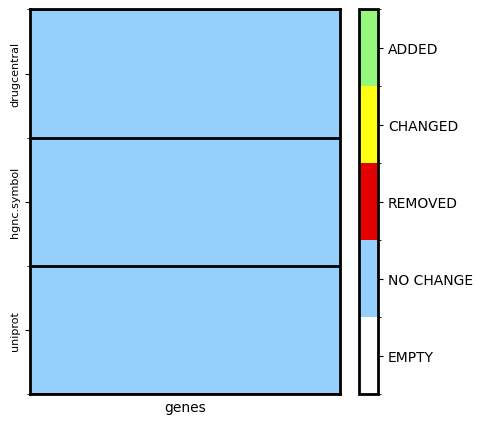

In [7]:
rename_mapping = {
    "ACCESSION": "uniprot",
    "GENE": "hgnc.symbol",
    "STRUCT_ID": "drugcentral",
}

df_annotations = pd.merge(
    df_model_mappings.loc[:, [annotation_type, mapping_key]],
    df_drugcentral.loc[:, list(rename_mapping)].rename(rename_mapping, axis=1),
    left_on=mapping_key,
    right_on=mapping_key,
    how="left",
)
df_annotations = df_annotations.dropna().drop_duplicates()
df_annotations = df_annotations.groupby(annotation_type).agg(
    lambda x: build_string(list(x.dropna().unique()))
)
df_annotations = df_annotations.reset_index(drop=False).dropna().drop_duplicates()
df_annotations = df_annotations.replace(float("nan"), pd.NA).replace("", pd.NA)
if compare:
    compare_on_index = [annotation_type]
    try:
        df_previous = pd.read_csv(
            f"{annotation_dirpath}/{annotation_type}_{db_tag}.tsv",
            sep="\t",
            index_col=None,
            dtype=str,
        )
        df_previous = df_previous.replace(float("nan"), pd.NA).replace("", pd.NA)
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=compare_on_index)
    df_comparision = compare_tables(
        df_previous.set_index(compare_on_index),
        df_annotations.set_index(compare_on_index),
    )

    fig, ax = plt.subplots(1, 1, figsize=compare_figsize)
    ax.yaxis.set_tick_params(labelsize=8)
    ax = visualize_comparison(df_comparision)

if display_nunique:
    for col in df_annotations.columns:
        df = explode_column(df_annotations, name=col, sep=";")
        df = df[col].drop_duplicates()
        print(f"{df.name}: {df.nunique()}")

if overwrite:
    df_annotations.to_csv(
        annotation_dirpath / f"{annotation_type}_{db_tag}.tsv", sep="\t", index=False
    )
else:
    df_annotations.to_csv(
        ROOT_PATH / INTERIM_PATH / f"{annotation_type}_{db_tag}.tsv",
        sep="\t",
        index=False,
    )
df_annotations